In [1]:
import tensorflow as tf

flowers_root = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)

In [2]:
from keras import optimizers
from keras import models
from keras import layers
from keras import callbacks

import cv2
import os

import numpy as np
import matplotlib.pyplot as plt


In [3]:
print("cd", flowers_root)

cd /root/.keras/datasets/flower_photos


In [4]:
import pathlib

data_dir = pathlib.Path(flowers_root)

image_count = len(list(data_dir.glob('*/*.jpg')))
print("There are", image_count, "images.")

CLASS_NAMES = np.array(
    [item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
print("These are the available classes:", CLASS_NAMES)



There are 3670 images.
These are the available classes: ['daisy' 'tulips' 'sunflowers' 'dandelion' 'roses']


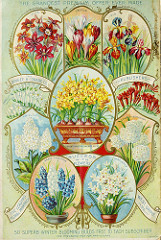

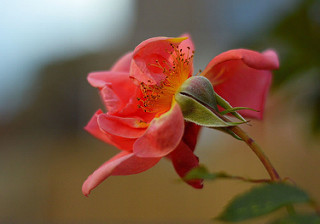

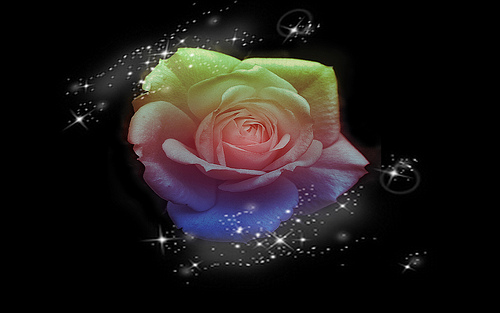

In [5]:
from PIL import Image

import IPython.display as display
roses = list(data_dir.glob('roses/*'))

for image_path in roses[:3]:
    display.display(Image.open(str(image_path)))


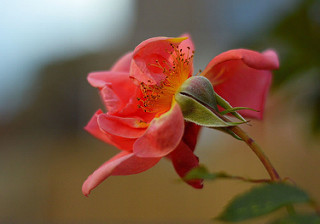

In [6]:
Image.open(str(roses[1]))

In [7]:
print(CLASS_NAMES)

['daisy' 'tulips' 'sunflowers' 'dandelion' 'roses']


In [8]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}



In [9]:
len(flowers_images_dict['roses'])

641

In [10]:
len(flowers_images_dict['daisy'])

633

In [11]:
len(flowers_images_dict['sunflowers'])

699

In [12]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [13]:
img = cv2.imread(str(flowers_images_dict['tulips'][0]))

In [14]:
img.shape

(240, 240, 3)

In [15]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [16]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [17]:
X = np.array(X)
y = np.array(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)




In [18]:
x_train = X_train.astype('float32') / 255.0
x_test = X_test.astype('float32') / 255.0

import keras.utils
y_train = keras.utils.to_categorical(y_train,num_classes=5)
y_test = keras.utils.to_categorical(y_test,num_classes=5)

In [19]:
model = keras.Sequential(
    [
      layers.Conv2D(32,(3,3),input_shape= (180,180,3),activation='relu') ,
      layers.BatchNormalization(),
      layers.MaxPooling2D((2,2)),

      layers.Conv2D(64,(3,3),activation='relu') ,
      layers.BatchNormalization(),
      layers.MaxPooling2D((2,2)),

      layers.Conv2D(128,(5,5),activation='relu') ,
      layers.BatchNormalization(),
      layers.MaxPooling2D((2,2)),
      layers.Dropout(0.15),


      layers.Conv2D(256,(5,5),activation='relu') ,
      layers.BatchNormalization(),
      layers.MaxPooling2D((3,3),strides=2),

      layers.GlobalAveragePooling2D(),
      layers.Dense(100,activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(5,activation='softmax')


    ]
)

In [20]:
model.compile(
    optimizer = keras.optimizers.Nadam(),
    loss = 'categorical_crossentropy',
    metrics = 'acc'
)

In [21]:
history = model.fit(x_train, y_train, epochs=50,
          batch_size = 64, validation_data =(x_test, y_test))

Epoch 1/50
43/43 [==============================] - 25s 215ms/step - loss: 1.4084 - acc: 0.4935 - val_loss: 1.8903 - val_acc: 0.2407
Epoch 2/50
43/43 [==============================] - 8s 176ms/step - loss: 1.0083 - acc: 0.6181 - val_loss: 3.1212 - val_acc: 0.2407
Epoch 3/50
43/43 [==============================] - 8s 177ms/step - loss: 0.9056 - acc: 0.6642 - val_loss: 2.9217 - val_acc: 0.2407
Epoch 4/50
43/43 [==============================] - 7s 174ms/step - loss: 0.8474 - acc: 0.6857 - val_loss: 2.7025 - val_acc: 0.2407
Epoch 5/50
43/43 [==============================] - 8s 177ms/step - loss: 0.7838 - acc: 0.7068 - val_loss: 2.9840 - val_acc: 0.2407
Epoch 6/50
43/43 [==============================] - 8s 179ms/step - loss: 0.7363 - acc: 0.7242 - val_loss: 1.6704 - val_acc: 0.2985
Epoch 7/50
43/43 [==============================] - 7s 172ms/step - loss: 0.6823 - acc: 0.7424 - val_loss: 1.6384 - val_acc: 0.3399
Epoch 8/50
43/43 [==============================] - 7s 174ms/step - loss: 0

In [22]:
model.evaluate(x_test,y_test,verbose= 2)

29/29 - 1s - loss: 1.6831 - acc: 0.7244 - 850ms/epoch - 29ms/step


[1.6831468343734741, 0.7244008779525757]

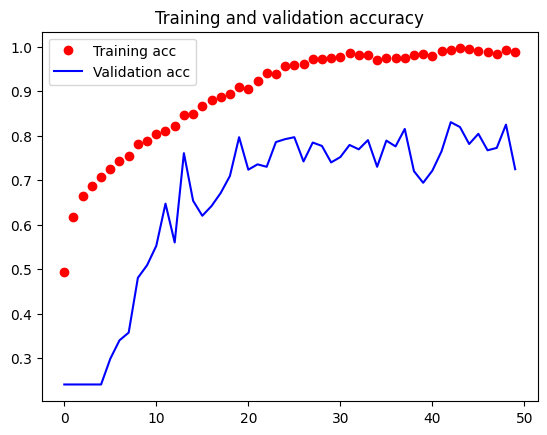

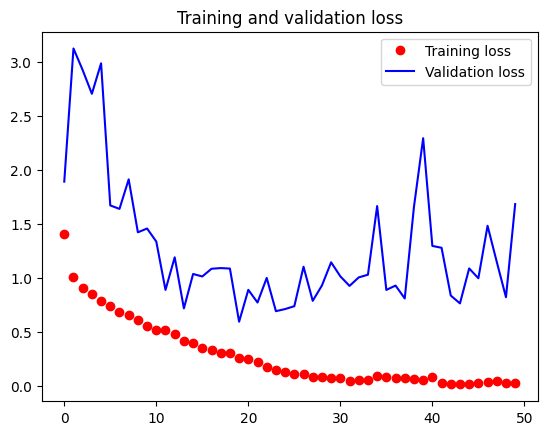

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


We need data Augmentation to handle the overfitting Problem!

In [30]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(180,
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.4),
  ]
)

In [31]:
model = keras.Sequential(
    [
      data_augmentation,
      layers.Conv2D(32,(3,3),input_shape= (180,180,3),activation='relu') ,
      layers.BatchNormalization(),
      layers.MaxPooling2D((2,2)),

      layers.Conv2D(64,(3,3),activation='relu') ,
      layers.BatchNormalization(),
      layers.MaxPooling2D((2,2)),

      layers.Conv2D(128,(5,5),activation='relu') ,
      layers.BatchNormalization(),
      layers.MaxPooling2D((2,2)),
      layers.Dropout(0.15),


      layers.Conv2D(256,(5,5),activation='relu') ,
      layers.BatchNormalization(),
      layers.MaxPooling2D((3,3),strides=2),

      layers.GlobalAveragePooling2D(),
      layers.Dense(100,activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(5,activation='softmax')


    ]
)

In [32]:
model.compile(
    optimizer = keras.optimizers.Nadam(),
    loss = 'categorical_crossentropy',
    metrics = 'acc'
)

In [33]:
hist2 = model.fit(x_train, y_train, epochs=50,
          batch_size = 64, validation_data =(x_test, y_test))

Epoch 1/50
43/43 [==============================] - 12s 195ms/step - loss: 1.5096 - acc: 0.4509 - val_loss: 1.7512 - val_acc: 0.2407
Epoch 2/50
43/43 [==============================] - 7s 171ms/step - loss: 1.0918 - acc: 0.5698 - val_loss: 2.1690 - val_acc: 0.2407
Epoch 3/50
43/43 [==============================] - 7s 175ms/step - loss: 1.0111 - acc: 0.5948 - val_loss: 2.7575 - val_acc: 0.2407
Epoch 4/50
43/43 [==============================] - 8s 177ms/step - loss: 0.9626 - acc: 0.6214 - val_loss: 3.0446 - val_acc: 0.2407
Epoch 5/50
43/43 [==============================] - 7s 174ms/step - loss: 0.9158 - acc: 0.6432 - val_loss: 2.2616 - val_acc: 0.2407
Epoch 6/50
43/43 [==============================] - 8s 180ms/step - loss: 0.9060 - acc: 0.6519 - val_loss: 2.6150 - val_acc: 0.2451
Epoch 7/50
43/43 [==============================] - 8s 178ms/step - loss: 0.8449 - acc: 0.6715 - val_loss: 2.2133 - val_acc: 0.2919
Epoch 8/50
43/43 [==============================] - 7s 174ms/step - loss: 0

In [29]:
model.evaluate(x_test,y_test)

29/29 [==============================] - 1s 20ms/step - loss: 0.7029 - acc: 0.7571


[0.7029411196708679, 0.757080614566803]

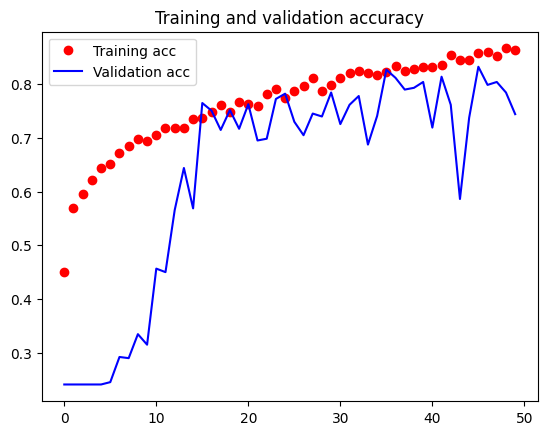

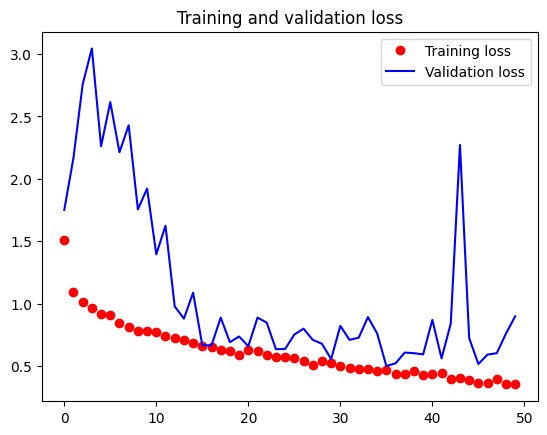

In [34]:


import matplotlib.pyplot as plt
%matplotlib inline
acc = hist2.history['acc']
val_acc = hist2.history['val_acc']
loss = hist2.history['loss']
val_loss = hist2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
